In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

Question 1)

In [125]:
def mse_loss_derivative(y, x, THETA):
    #calculating each dimension of the theta array seperately
    y_fitted_0 = np.mean(-2 * (y - (THETA[0] + THETA[1] * x)))
    y_fitted_1 = np.mean(-2 * (y - (THETA[0] + THETA[1] * x))*x)
    gradient = np.array([y_fitted_0, y_fitted_1])
    return gradient

In [127]:
print(mpg[['weight', 'mpg']].describe())

            weight         mpg
count   398.000000  398.000000
mean   2970.424623   23.514573
std     846.841774    7.815984
min    1613.000000    9.000000
25%    2223.750000   17.500000
50%    2803.500000   23.000000
75%    3608.000000   29.000000
max    5140.000000   46.600000


In [126]:
mpg = sns.load_dataset("mpg")

In [128]:
X = (mpg.weight - np.mean(mpg.weight)) / np.sqrt(np.var(mpg.weight))

In [129]:
y = mpg.mpg

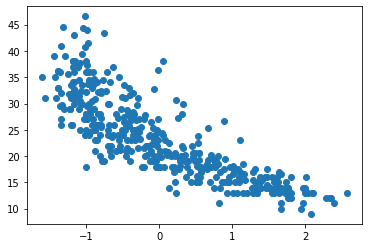

In [130]:
plt.plot(X, y, "o")

B) It looks like as the weight increases The mpg decreases causing a negative slope. 

Since the range of the mpg column is drastically smaller than the range of the weight column it will have a fairly steep slope so for my slope im starting with -100

And since the minimum of the MPG is close to the y-intercept, the y-intercept will be close to the maximum weight value so Im choose 5500 for me y-intercept

In [204]:
THETA = np.array([5500, -100])
print(THETA[0])
print(THETA[1])

5500
-100


In [132]:
def gradient_descent(initial_guess, alpha, gradient, n):
    guesses = [initial_guess]
    guess = initial_guess
    i = 0
    while i < n:
        guess = guess - alpha * gradient(guess)
        guesses.append(guess)
        i+=1
    return np.array(guesses)

In [133]:
def gradient(THETA):
    x = mpg['mpg']
    y = mpg['weight']
    return mse_loss_derivative(y, x, THETA)

In [162]:
guesses = gradient_descent(THETA, 0.0001, gradient, 1000)

In [163]:
guesses

array([[5500.        , -100.        ],
       [5499.96437638, -100.71722769],
       [5499.93213295, -101.34623075],
       ...,
       [5491.7388171 , -105.52788186],
       [5491.73084287, -105.52757635],
       [5491.72286881, -105.52727085]])

In [166]:
def mse(t):
    a, b = t
    return np.mean((mpg.weight - (a + b*mpg.mpg))**2)

In [167]:
def mse_2arg(a,b):
    return np.mean((mpg.weight - (a+b*mpg.mpg))**2)

In [194]:
avalues = np.linspace(-50000, 50000, 100)
bvalues = np.linspace(1000, -1000, 100)
zvalues = np.linspace(0, 10000000,100)
(a,b) = np.meshgrid(avalues, bvalues)
thetas = np.vstack((a.flatten(), b.flatten()))
MSE = np.array([mse(t) for t in thetas.T])

In [169]:
df = pd.DataFrame(guesses, columns = ['x', 'y'])
x_values = df['x'].to_numpy()
y_values = df['y'].to_numpy()

In [170]:
def z_column(x_values, y_values):
    z_coordinates = [mse_2arg(x_values[0], y_values[0])]
    i = 1
    while i < 1001:
        z = mse_2arg(x_values[i], y_values[i])
        z_coordinates.append(z)
        i+=1
    return np.array(z_coordinates)

In [179]:
z_values = z_column(x_values, y_values)
df['z'] = z_values
df

,x,y,z
0,5500.000000,-100.000000,258150.464824
1,5499.964376,-100.717228,253310.606631
2,5499.932133,-101.346231,249587.591582
3,5499.902854,-101.897857,246723.662265
4,5499.876175,-102.381620,244520.549376
...,...,...,...
996,5491.754766,-105.528493,236535.584072
997,5491.746791,-105.528187,236534.947212
998,5491.738817,-105.527882,236534.310377
999,5491.730843,-105.527576,236533.673567


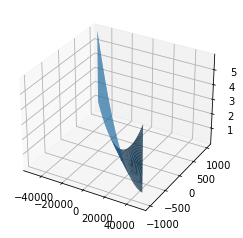

In [213]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(avalues, bvalues, np.reshape(MSE, a.shape))
ax.plot3D(df['x'], df['y'], df['z'], 'red')
plt.show()
#I cant seem to figure out how to get the gradients and the surface to co-exist so
#I just used table for the other questions.

**D)**

In [205]:
THETA = np.array([5500, -100])
guesses2 = gradient_descent(THETA, 0.001, gradient, 1000)
guesses3 = gradient_descent(THETA, 0.00001, gradient, 1000)

In [206]:
gradient_guesses_2 = pd.DataFrame(guesses2, columns = ['x', 'y'])
x_values_2 = gradient_guesses_2['x'].to_numpy()
y_values_2 = gradient_guesses_2['y'].to_numpy()
z_values_2 = z_column(x_values_2, y_values_2)
gradient_guesses_2['z'] = z_values_2
gradient_guesses_2

,x,y,z
0,5500.000000,-100.000000,258150.464824
1,5499.643764,-107.172277,238280.784853
2,5499.625546,-105.522091,237227.567165
3,5499.529758,-105.897052,237165.802148
4,5499.451796,-105.807152,237156.279826
...,...,...,...
996,5426.255776,-103.019124,231730.533281
997,5426.189015,-103.016566,231726.070162
998,5426.122267,-103.014009,231721.608812
999,5426.055533,-103.011452,231717.149230


In [207]:
gradient_guesses_3 = pd.DataFrame(guesses3, columns = ['x', 'y'])
x_values_3 = gradient_guesses_3['x'].to_numpy()
y_values_3 = gradient_guesses_3['y'].to_numpy()
z_values_3 = z_column(x_values_3, y_values_3)
gradient_guesses_3['z'] = z_values_3
gradient_guesses_3

,x,y,z
0,5500.000000,-100.000000,258150.464824
1,5499.996438,-100.071723,257637.950103
2,5499.992909,-100.142563,257137.959473
3,5499.989414,-100.212532,256650.186848
4,5499.985952,-100.281641,256174.333625
...,...,...,...
996,5498.967117,-105.804783,237116.743725
997,5498.966306,-105.804753,237116.677735
998,5498.965494,-105.804722,237116.611744
999,5498.964682,-105.804691,237116.545754


Since both learning rates having the same initial theta so they start at the same squared loss value, The one set of guesses with the higher learning rate is at a lower point in the Loss function.

**E)**

In [208]:
THETA1 = np.array([2000, -4])
THETA2 = np.array([20000, -40])
THETA3 = np.array([200000, -400])

In [209]:
guesses4 = gradient_descent(THETA1, 0.00001, gradient, 1000)
guesses5 = gradient_descent(THETA2, 0.00001, gradient, 1000)
guesses6 = gradient_descent(THETA3, 0.00001, gradient, 1000)

In [210]:
gradient_guesses_4 = pd.DataFrame(guesses4, columns = ['x', 'y'])
x_values_4 = gradient_guesses_4['x'].to_numpy()
y_values_4 = gradient_guesses_4['y'].to_numpy()
z_values_4 = z_column(x_values_4, y_values_4)
gradient_guesses_4['z'] = z_values_4
gradient_guesses_4

,x,y,z
0,2000.000000,-4.000000,1.805507e+06
1,2000.021290,-3.604335,1.789903e+06
2,2000.042393,-3.213539,1.774680e+06
3,2000.063312,-2.827550,1.759830e+06
4,2000.084049,-2.446310,1.745342e+06
...,...,...,...
996,2007.325229,27.965322,1.163466e+06
997,2007.331339,27.965090,1.163462e+06
998,2007.337449,27.964858,1.163458e+06
999,2007.343559,27.964625,1.163454e+06


In [211]:
gradient_guesses_5 = pd.DataFrame(guesses5, columns = ['x', 'y'])
x_values_5 = gradient_guesses_5['x'].to_numpy()
y_values_5 = gradient_guesses_5['y'].to_numpy()
z_values_5 = z_column(x_values_5, y_values_5)
gradient_guesses_5['z'] = z_values_5
gradient_guesses_5

,x,y,z
0,20000.000000,-40.000000,2.592292e+08
1,19999.678220,-47.627594,2.534367e+08
2,19999.360034,-55.161390,2.477857e+08
3,19999.045397,-62.602541,2.422728e+08
4,19998.734266,-69.952185,2.368947e+08
...,...,...,...
996,19946.865222,-659.323672,2.213247e+07
997,19946.835768,-659.322578,2.213238e+07
998,19946.806313,-659.321483,2.213229e+07
999,19946.776859,-659.320387,2.213221e+07


In [212]:
gradient_guesses_6 = pd.DataFrame(guesses6, columns = ['x', 'y'])
x_values_6 = gradient_guesses_6['x'].to_numpy()
y_values_6 = gradient_guesses_6['y'].to_numpy()
z_values_6 = z_column(x_values_6, y_values_6)
gradient_guesses_6['z'] = z_values_6
gradient_guesses_6

,x,y,z
0,200000.000000,-400.000000,3.520874e+10
1,199996.247525,-487.860184,3.444015e+10
2,199992.536445,-574.639906,3.369034e+10
3,199988.866251,-660.352451,3.295885e+10
4,199985.236440,-745.010941,3.224524e+10
...,...,...,...
996,199342.265158,-7532.213615,3.745913e+09
997,199341.880057,-7532.199253,3.745898e+09
998,199341.494956,-7532.184886,3.745883e+09
999,199341.109857,-7532.170514,3.745868e+09


The loss function value is decreasing for all 3 theta values but the first one is the closest to the minimum and the last one is most far despite decreasing on a heavier slope, it seems to be decreasing faster but not fast enough to catch up to the other 2.

**F)**

With a learning rate of 0.1 the gradient diverges and goes back and forth from positive extremes to negative extremes. This is because the learning rate is too high, this causes the gradient to jump ahead and behind the minimum and the far jumps eventually lead to extreme jumps

**QUESTION 2)** 𝑦𝑖 = 𝜃1𝑥𝑖 + 𝜖𝑖

Squared loss function: L(y,𝜃1, 𝑥𝑖, 𝜖𝑖) = (yi - 𝜃1*𝑥𝑖 - 𝜖𝑖)^2

First Derivative: dL/d𝜃1 (L(y,𝜃1, 𝑥𝑖, 𝜖𝑖)) = -2*xi*(yi - 𝜃1*𝑥𝑖 - 𝜖𝑖)

Second Derivative: d^2L/d𝜃1^2 (L(y,𝜃1, 𝑥𝑖, 𝜖𝑖)) = -2*xi*(-xi) =2*(xi)^2

Since 2 is always positive and a square number will always be positive and two positive numbers multiplied together will be positive, the second derivative is always positive meaning the squared loss model for this model is convex

**B)**
To find the ordinary least square we need to find when the residual vector is orthogonal to the span of x AKA when the dot product is zero. 

Since were performing dot product the span must be transposed, it will still give them same span were just now able to take the dot product

^𝜃1 - theta hat

X^T(Y- (X * ^𝜃1 + 𝜖)) = 0

X^T * Y - X^T * X * ^𝜃1 - X^T * 𝜖 = 0

X^T * Y - X^T * 𝜖 = X^T * X * ^𝜃1

(X^T * Y - X^T * 𝜖) * (X^T * X)^-1 = ^𝜃1

**C)**

V(^𝜃1) = V((X^T * Y - X^T * 𝜖)*(X^T * X)^-1)

= E(((X^T * Y - X^T * 𝜖) * ( X^T * X)^-1)^2) - (((𝜇(𝑋^T) * 𝜇Y - 𝜇(𝑋^T) * 0) * (𝜇(𝑋^T) * 𝜇X)^-1)^2)

ASIDE: X^T * (X^T)^-1  = i (identity matrix)

= E(((i * X * Y) - (i * X * 𝜖))^2) - (((𝜇(𝑋^T) * 𝜇Y) - 1)^2)

= E(((i * X * Y)^2 - 2 * (i * X * Y) * (i * X * 𝜖) + (i * X * 𝜖)^2)) - (𝜇(𝑋^T) * 𝜇Y)^2 + 2 * 𝜇(𝑋^T) * 𝜇Y) * (𝜇(𝑋^T) * 𝜇X)^-1) - (𝜇(𝑋^T) * 𝜇X)^-2)

= E((i * X * Y)^2) - E(2 * (i * X * Y) * (i * X * 𝜖)) + E((i * X * 𝜖)^2) - (𝜇(𝑋^T) * 𝜇Y)^2 + 2 * 𝜇(𝑋^T) * 𝜇Y) * (𝜇(𝑋^T) * 𝜇X)^-1) - (𝜇(𝑋^T) * 𝜇X)^-2) 

= E((X * Y)^2) - (𝜇(𝑋^T) * 𝜇Y)^2 - E(2 * (i * X * Y) * (i * X * 𝜖)) + 2 * 𝜇(𝑋^T) * 𝜇Y) * (𝜇(𝑋^T) * 𝜇X)^-1) + E((i * X * 𝜖)^2) -  (𝜇(𝑋^T) * 𝜇X)^-2)

= V(X * Y) - E(2 * (i * X * Y) * (i * X * 𝜖)) + 2 * 𝜇(𝑋^T) * 𝜇Y) * (𝜇(𝑋^T) * 𝜇X)^-1) + E((i * X * 𝜖)^2) -  (𝜇(𝑋^T) * 𝜇X)^-2)

**PART B)**

**QUESTION 1)**
a)

Let L be the event that Joel is late for work

Let R be the event that the day is rainy

Let !R be the event that the day is not rainy

our values are:

p(L|R) = 0.3

p(L|!R) = 0.1

p(R) = 0.7

p(!R) = 0.3

by Bayes theorem p(L) = p(L|R)*P(R) + p(L|!R)*p(R)

p(L) = 0.3(0.7)+(0.1)(0.3)

p(L) = 0.24

**b)**

p(L|R) = p(R n L)/p(R) --> p(R n L) = p(L|R)*p(R)

p(R n L) = 0.21

1 = p(R n L) + p(R n !L) --> p(R n !L) = 1 - p(R n L)

p(R n !L) = 0.79

1 = p(L) + p(!L) --> p(!L) = 1 - p(L)

p(!L) = 0.76

p(R|!L) = P(R n !L)/P(!L)

p(R|!L) = 0.2763

**QUESTION 2) a)**

p(E|FnG)*p(G|F)+p(E|Fn!G)*p(!G|F)

=(p(EnFnG)/~p(FnG)~)*(~p(GnF)~/P(F)) + (p(EnFn!G)/~p(Fn!G)~) * (~p(!GnF)~)/p(F)

=(p(EnFnG)+p(EnFn!G))/p(F)

=p(EnF)/p(F)

=p(E|F)

**B)** Let E = the event that people support Elenor from the conservative party as mayor of the town

Let F = the event that people support Fatima from the conservative party as mayor of the town

Let G = the event that people support George from the conservative party as mayor of the town

The left hand side is the probability of people supporting Elenor given they support Fatima

The Right hand side is (the probability of people support Elenor if they support Fatima and George multiplied by the probability they support George if they support Fatima) OR (the probability of people support Elenor if they support Fatima and not George multiplied by the probability that they support dont George if they support Fatima.

**QUESTION 3)**

**E(X+Y)** = E(X) + E(Y) = 𝜇𝑋 + 𝜇𝑌

**VAR(X+Y)** = E((X+Y)^2) - E(X+Y)^2

=E(X^2+2*X*Y+Y^2) - (𝜇𝑋 + 𝜇𝑌)^2

=E(X^2) + 2*E(XY)+E(Y^2) - 𝜇^2𝑋 - 2*𝜇𝑋*𝜇𝑌 - 𝜇^2𝑌

=E(X^2) - 𝜇X^2 + 2(E(XY) - *𝜇𝑋*𝜇𝑌) + E(Y^2) - 𝜇𝑌

=𝜎X^2 + 2 cov(X,Y) + 𝜎Y^2

**E(X^2 + Y)** = 𝜇X^2 + 𝜇Y

**VAR(X^2 + Y)** = E((X^2 + Y)^2) - E(x^2+Y)^2

=E(X^4 + 2*X^2*Y + Y^2) - (𝜇X^2 + 𝜇Y)^2

=E(X^4) + 2* E(X^2*Y) + E(Y*2) - 𝜇X^4 - (2 * 𝜇X^2 * 𝜇Y) - 𝜇Y^2

=E(X^4) - 𝜇X^4 + 2(E(X^2*Y)-𝜇X^2 * 𝜇Y) +  E(Y*2) - 𝜇Y^2

=(𝜎X^2)^2 + 2 cov(X^2,Y) + 𝜎Y^2

**PART C 1)**

Since each event (a song being chosen randomly) is a bernoulli trail and x is the first time it appears meaning that the other times it does not appear, it follows a negative binomial distribution

p(X = the first time a shakey Graves song comes on) = (x+2-1 choose 1) * (0.2)^2 * (0.8)^x

**2)**

Given that the order is randomized for each shuffle after you listen to a song theres a 1 out of the remaining songs chance that the next song will be a shakey graves song

so if the current shakey graves song is the xth song played the probability is 1/(10-x) that the next song will be a shakey graves song

**3)**

There are 9 slots for 8 indiviudal songs and the 2 shakey graves songs back to back,therefore their is 9!=362 880 arrangements * 2 (for the order of the shakey grave songs) = 725 760.

There are 10! = 3 628 800 arrangements total, therefore p(shakey grave songs playing back to back) = 725 760/3 628 800 = 0.2 

**4)**
I shuffled the playist 30 times and found that 2 of the 30 times shakey grave songs played back to back

**5)**
if X = the number of times in 30 shuffles that shakey graves play back to back then E(X) = 6 considering that the result in c and 30 * 0.2 = 6. Since the x from the sample shuffles were very different from the expected value it doesn't align with our hypothesis that the shuffles are truly random